In [2]:
# ----- Introduction ----- #
# Workbook Owner: Max Brear
# Title: Data Science Final Project
# Jupyter Notebook

In [3]:
# ----- Workbook Sections ----- #
# Section 1: Data Load & Setup
# Section 2: Exploratory Data Analysis (EDA)
    # - Rename Columns
    # - Correct Data Types
    # - Check Data Structure
# Section 3: Feature Selection (Using feature selection tool)
# Section 4: Address Imbalance (Overbalancing using SMOTE)
# Section 5: Logisitic Regression (sklearn with TTSplit)
    # - Accuracy
    # - Recall
    # - Overfitting
# Section 6: Insight & Conclusions

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline

In [5]:
# --> Change output display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
# - Import CSV data file
dataset_00 = pd.read_csv('project_data/2016-gla-data-extract-casualty-attendant.csv')
dataset_00.head(3)

,AREFNO,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,Location,Accident Severity,No. of Casualties in Acc.,No. of Vehicles in Acc.,Accident Date,Day,Time,Highway,Road Class 1,Road No. 1,Road Type,Speed Limit,Junction Detail,Junction Control,Road Class 2,Road No. 2,Ped. Crossing Decoded,Light Conditions (Banded),Weather,Road Surface,Special Conditions,C/W Hazard
0,1160001090,CITY OF LONDON,0,531350,181580,1,3 Pedestrian,1 Male,25-59,54,1,3 Slight,09 In Road - Not Crossing,7 In Rd Facing Traffic,1 Pedestrian,HOLBORN 21M W OF J/W HATTON GARDEN,3 Slight,1,1,42685,Friday,'0003,3 Bor,A,40,6 Single Cwy,2 30 MPH,0 No Jun In 20m,-2 Not Applicable,-2 Not Applicable,0,8 Central Refuge,2 Dark,1 Fine,1 Road-Dry,0 None,0 None
1,1160002980,CITY OF LONDON,0,532780,180410,1,1 Driver/Rider,1 Male,25-59,46,1,2 Serious,-2 Unknown,-2 N/A,2 Pedal Cycle,KING WILLIAM STREET 60M N OF J/W MONTAGUE CLOSE,2 Serious,1,2,42696,Tuesday,'1745,1 TLRN,A,3,3 Dual Cwy,1 <= 20 MPH,0 No Jun In 20m,-2 Not Applicable,-2 Not Applicable,0,0 No Xing Facility In 50m,2 Dark,1 Fine,1 Road-Dry,0 None,0 None
2,1160006347,CITY OF LONDON,0,531400,181570,3,2 Passenger,2 Female,60+,61,1,3 Slight,-2 Unknown,-2 N/A,4 Car,HOLBORN CIRCUS J/W CHARTERHOUSE STREET,3 Slight,3,2,42715,Sunday,'1710,3 Bor,A,40,2 One-Way St,1 <= 20 MPH,7 Multi Jun,2 Auto Sig,A,40,5 Pedn Phase At Ats,2 Dark,1 Fine,1 Road-Dry,3 Road Sign Def,0 None


In [7]:
def intro_eda(data):
    print('--- Data Summary ---')
    print('Type: ' + str(type(data)))
    print('Index: ' + str(data.index))
    print('Shape: ' + str(data.shape))
    print('')
    print('--- Features & Data Types ---')
    print(data.info())

In [8]:
intro_eda(dataset_00)

--- Data Summary ---
Type: <class 'pandas.core.frame.DataFrame'>
Index: RangeIndex(start=0, stop=30270, step=1)
Shape: (30270, 37)

--- Features & Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30270 entries, 0 to 30269
Data columns (total 37 columns):
AREFNO                       30270 non-null object
Borough                      30270 non-null object
Boro                         30270 non-null int64
Easting                      30270 non-null int64
Northing                     30270 non-null int64
CREFNO                       30270 non-null int64
Casualty Class               30270 non-null object
Casualty Sex                 30270 non-null object
Casualty Age (Banded)        30270 non-null object
Casualty Age                 30270 non-null int64
No. of Casualties            30270 non-null int64
Casualty Severity            30270 non-null object
Ped. Location                30270 non-null object
Ped. Movement                30270 non-null object
Mode of Travel       

In [9]:
# Rename colums to remove spaces
dataset_01 = pd.DataFrame()
dataset_01 = dataset_00

# Rename colums to remove spaces
dataset_01.rename(columns={'AREFNO':'accident_ref',
                           'Borough':'borough_name',
                           'Boro':'borough_num',
                           'Easting':'east_coordinate',
                           'Northing':'north_coordinate',
                           'CREFNO':'casualty_ref',
                           'Casualty Class':'casualty_class',
                           'Casualty Sex':'casualty_sex',
                           'Casualty Age (Banded)':'casualty_age_banded',
                           'Casualty Age':'casualty_age',
                           'No. of Casualties':'num_of_casualties',
                           'Casualty Severity':'casualty_severity',
                           'Ped. Location':'ped_location',
                           'Ped. Movement':'ped_movement',
                           'Mode of Travel':'mode_of_travel',
                           'Location':'accident_location',
                           'Accident Severity':'accident_severity',
                           'No. of Casualties in Acc.':'total_num_of_casualties_in_accident',
                           'No. of Vehicles in Acc.':'num_of_vehicles',
                           'Accident Date':'date',
                           'Day':'day',
                           'Time':'time',
                           'Highway':'highway_jurisdiction',
                           'Road Class 1':'road_1_class',
                           'Road No. 1':'road_1_num',
                           'Road Type':'road_type',
                           'Speed Limit':'speed_limit',
                           'Junction Detail':'junction_detail',
                           'Junction Control':'junction_control_feature',
                           'Road Class 2':'road_2_class',
                           'Road No. 2':'road_2_num',
                           'Ped. Crossing Decoded':'ped_crossing_feature',
                           'Light Conditions (Banded)':'light_conditions',
                           'Weather':'weather_conditions',
                           'Road Surface':'road_surface_conditions',
                           'Special Conditions':'other_conditions',
                           'C/W Hazard':'road_hazard'}, inplace=True)

# Change the datatype of road numbers from numeric to string (as they're effectively just a label)
dataset_01['road_1_num'] = dataset_01.road_1_num.astype('str')
dataset_01['road_2_num'] = dataset_01.road_2_num.astype('str')

# Change the datatype of time to numeric having removed the ' sign first
dataset_01['time'] = dataset_01.time.str.replace("[({':]", "")
dataset_01['time'] = dataset_01.time.astype('int')

In [10]:
# Numeric features EDA

In [11]:
# --> Print all numeric features
numeric_features = pd.DataFrame()
numeric_features = dataset_01.describe()
numeric_features

,borough_num,east_coordinate,north_coordinate,casualty_ref,casualty_age,num_of_casualties,total_num_of_casualties_in_accident,num_of_vehicles,date,time
count,30270.000000,30270.000000,30270.000000,30270.000000,30270.000000,30270.0,30270.000000,30270.000000,30270.000000,30270.000000
mean,15.474265,530686.968748,180675.708986,1.248431,34.737496,1.0,1.496862,1.842517,42556.970697,1406.000628
std,9.844262,10056.047974,7523.962106,0.722207,17.660276,0.0,1.120085,0.676490,106.562009,549.652059
min,0.000000,503830.000000,156920.000000,1.000000,0.000000,1.0,1.000000,1.000000,42370.000000,1.000000
25%,7.000000,524740.000000,175890.000000,1.000000,23.000000,1.0,1.000000,1.000000,42466.000000,1005.000000
50%,15.000000,531080.000000,181170.000000,1.000000,32.000000,1.0,1.000000,2.000000,42557.000000,1505.000000
75%,25.000000,536767.500000,185830.000000,1.000000,46.000000,1.0,2.000000,2.000000,42653.000000,1825.000000
max,32.000000,559770.000000,200900.000000,19.000000,96.000000,1.0,19.000000,9.000000,42735.000000,2359.000000


In [12]:
# Create a copy of the dataframe for use during feature adjustments
dataset_02 = pd.DataFrame()
dataset_02 = dataset_01

In [13]:
# borough_num
# --> Action: DROP
# --> Feature is simply a label and we already have borough name which can be used for classification later
dataset_02.drop('borough_num', axis=1, inplace=True)

In [14]:
# east_coordinate / north_coordinate
# --> Action: KEEP / NO CHANGE
# --> Kept as may be an indicator to driving habits (plus it's numeric)

In [15]:
# casualty_ref
# --> Action: DROP
# --> No data dictionary exists and it's not clear what this represents
dataset_02.drop('casualty_ref', axis=1, inplace=True)

In [16]:
# casualty_age
# --> Action: KEEP / NO CHANGE
# --> Feature could be used to target specific areas based on population demographic

In [17]:
# num_of_casualties
# --> Action: DROP
# --> Each row represents 1 casualty so all values are 1
dataset_02.drop('num_of_casualties', axis=1, inplace=True)

In [18]:
# total_num_of_casualties_in_accident
# --> Action: DROP
# --> Analysis is by casualty not by accident so number of casulaties per accident isn't important
dataset_02.drop('total_num_of_casualties_in_accident', axis=1, inplace=True)

In [19]:
# num_of_vehicles
# --> Action: KEEP / NO CHANGE
# --> Kept number of vehicles as this could be used as an indication of whether the road is busy

In [20]:
# date
# --> Action: DROP
# --> Drop date as sample size is for 1 year and seasonal variations are captured in other features
dataset_02.drop('date', axis=1, inplace=True)

In [21]:
# time
# --> Action: DROP
# --> Drop time as adds complexity and we already have a night / day feature
# --> Could be included with more time to complete the project
dataset_02.drop('time', axis=1, inplace=True)

In [22]:
# Object features EDA

In [23]:
# --> Print all numeric features
object_features = pd.DataFrame()
object_features = dataset_01.describe(include=['object'])
object_features

,accident_ref,borough_name,casualty_class,casualty_sex,casualty_age_banded,casualty_severity,ped_location,ped_movement,mode_of_travel,accident_location,accident_severity,day,highway_jurisdiction,road_1_class,road_1_num,road_type,speed_limit,junction_detail,junction_control_feature,road_2_class,road_2_num,ped_crossing_feature,light_conditions,weather_conditions,road_surface_conditions,other_conditions,road_hazard
count,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270,30270
unique,25126,33,3,2,5,3,11,10,8,22765,3,7,3,5,385,6,6,10,6,6,371,7,2,9,6,9,7
top,0116CW10516,WESTMINSTER,1 Driver/Rider,1 Male,25-59,3 Slight,-2 Unknown,-2 N/A,4 Car,BRIXTON HILL J/W HAYTER ROAD,3 Slight,Friday,3 Bor,A,0,6 Single Cwy,2 30 MPH,3 T/Stag Jun,4 Give Way/Uncontrolled,Unclassified,0,0 No Xing Facility In 50m,1 Daylight,1 Fine,1 Road-Dry,0 None,0 None
freq,19,1776,19288,19723,19170,27769,24721,24721,11891,19,27430,4860,21270,19063,8378,22837,25013,13145,16061,13366,23914,18842,20332,25568,24691,29349,29320


In [24]:
# Display unique values for all objects with less than 20 Unique values
def object_values_1(data):
    print('--- casualty_class ---'), print(data.casualty_class.value_counts()), print('')
    print('--- casualty_sex ---'), print(data.casualty_sex.value_counts()), print('')
    print('--- casualty_age_banded ---'), print(data.casualty_age_banded.value_counts()), print('')
    print('--- casualty_severity ---'), print(data.casualty_severity.value_counts()), print('')
    print('--- ped_location ---'), print(data.ped_location.value_counts()), print('')
    print('--- ped_movement ---'), print(data.ped_movement.value_counts()), print('')
    print('--- mode_of_travel ---'), print(data.mode_of_travel.value_counts()), print('')
    print('--- accident_severity ---'), print(data.accident_severity.value_counts()), print('')
    print('--- day ---'), print(data.day.value_counts()), print('')
    print('--- highway_jurisdiction ---'), print(data.highway_jurisdiction.value_counts()), print('')
    print('--- road_1_class ---'), print(data.road_1_class.value_counts()), print('')
    print('--- road_type ---'), print(data.road_type.value_counts()), print('')
    print('--- speed_limit ---'), print(data.speed_limit.value_counts()), print('')
    print('--- junction_detail ---'), print(data.junction_detail.value_counts()), print('')
    print('--- junction_control_feature ---'), print(data.junction_control_feature.value_counts()), print('')
    print('--- road_2_class ---'), print(data.road_2_class.value_counts()), print('')
    print('--- ped_crossing_feature ---'), print(data.ped_crossing_feature.value_counts()), print('')
    print('--- light_conditions ---'), print(data.light_conditions.value_counts()), print('')
    print('--- weather_conditions ---'), print(data.weather_conditions.value_counts()), print('')
    print('--- road_surface_conditions ---'), print(data.road_surface_conditions.value_counts()), print('')
    print('--- other_conditions ---'), print(data.other_conditions.value_counts()), print('')
    print('--- road_hazard ---'), print(data.road_hazard.value_counts()), print('')

In [25]:
object_values_1(dataset_01)

--- casualty_class ---
1 Driver/Rider    19288
3 Pedestrian       5549
2 Passenger        5433
Name: casualty_class, dtype: int64

--- casualty_sex ---
1 Male      19723
2 Female    10547
Name: casualty_sex, dtype: int64

--- casualty_age_banded ---
25-59      19170
16-24       5260
60+         2654
0-15        2063
Unknown     1123
Name: casualty_age_banded, dtype: int64

--- casualty_severity ---
3 Slight     27769
2 Serious     2385
1 Fatal        116
Name: casualty_severity, dtype: int64

--- ped_location ---
-2 Unknown                          24721
05 Crossing Road (Not On Xing)       2465
01 Crossing Road On Ped Xing         1189
04 Crossing Road Within 50m Xing      690
09 In Road - Not Crossing             437
06 On Footpath - Verge                337
10 Unknown                            316
08 In Centre Of Carriageway            82
02 Crossing Road In Zig-Zag App        16
07 On Refuge                            9
03 Crossing Road In Zig-Zag Exit        8
Name: ped_location,

In [26]:
# accident_ref
# --> Action: DROP
# --> Unique reference but contains no road characteristics
dataset_02.drop('accident_ref', axis=1, inplace=True)

In [27]:
# borough_name
# --> Action: KEEP / NO CHANGE
# --> Keep as might be useful where sharing recommendations / actions with clients

In [28]:
# casualty_class
# --> Action: KEEP / RENAME
# --> Remove numbers and '/' sign from the data
dataset_02['casualty_class'].replace('1 Driver/Rider', 'Driver or Rider', inplace = True)
dataset_02['casualty_class'].replace('3 Pedestrian', 'Pedestrian', inplace = True)
dataset_02['casualty_class'].replace('2 Passenger', 'Passenger', inplace = True)

In [29]:
# casualty_sex
# --> Action: DROP
# --> Should not influence preventative action therefore not important 
dataset_02.drop('casualty_sex', axis=1, inplace=True)

In [30]:
# casualty_age_banded
# --> Action: DROP
# --> Not required as absolute age is present in the dataset
dataset_02.drop('casualty_age_banded', axis=1, inplace=True)

In [31]:
# casualty_severity
# --> TARGET VARIABLE
# --> Action: KEEP / RENAME / CONSOLIDATE
# --> Remove numbers and consolidate Serious and Fatal to make a 2-classification problem
dataset_02['casualty_severity'].replace('1 Fatal', 'Serious', inplace = True)
dataset_02['casualty_severity'].replace('2 Serious', 'Serious', inplace = True)
dataset_02['casualty_severity'].replace('3 Slight', 'Slight', inplace = True)

In [32]:
# ped_location
# --> Action: KEEP / RENAME / CONSOLIDATE
# --> Too many and very similar variables - rename and consolidate to simplify model
dataset_02['ped_location'].replace('-2 Unknown', 'Unknown', inplace = True)
dataset_02['ped_location'].replace('05 Crossing Road (Not On Xing)', 'Crossing Road off Pedestrian Crossing', inplace = True)
dataset_02['ped_location'].replace('01 Crossing Road On Ped Xing', 'Crossing Road on Pedestrian Crossing', inplace = True)
dataset_02['ped_location'].replace('04 Crossing Road Within 50m Xing', 'Crossing Road off Pedestrian Crossing', inplace = True)
dataset_02['ped_location'].replace('09 In Road - Not Crossing', 'In Road not Crossing', inplace = True)
dataset_02['ped_location'].replace('06 On Footpath - Verge', 'Footpath', inplace = True)
dataset_02['ped_location'].replace('10 Unknown', 'Unknown', inplace = True)
dataset_02['ped_location'].replace('08 In Centre Of Carriageway', 'Central Carriageway', inplace = True)
dataset_02['ped_location'].replace('02 Crossing Road In Zig-Zag App', 'Crossing Road off Pedestrian Crossing', inplace = True)
dataset_02['ped_location'].replace('07 On Refuge', 'Traffic Island', inplace = True)
dataset_02['ped_location'].replace('03 Crossing Road In Zig-Zag Exit', 'Crossing Road off Pedestrian Crossing', inplace = True)

In [33]:
# ped_movement
# --> Action: KEEP / RENAME / CONSOLIDATE
# --> Too many and very similar variables - rename and consolidate to simplify model
dataset_02['ped_movement'].replace('-2 N/A', 'Not Applicable', inplace = True)
dataset_02['ped_movement'].replace('1 From Drivers N/Side', 'Drivers Near Side', inplace = True)
dataset_02['ped_movement'].replace('3 From Drivers O/Side', 'Drivers On Side', inplace = True)
dataset_02['ped_movement'].replace('9 Unknown Or Other', 'Unknown', inplace = True)
dataset_02['ped_movement'].replace('2 From Drivers N/Side Msk', 'Drivers Near Side', inplace = True)
dataset_02['ped_movement'].replace('4 From Drivers O/Side Msk', 'Drivers On Side', inplace = True)
dataset_02['ped_movement'].replace('5 In Rd Not Crossing', 'In Road not Crossing', inplace = True)
dataset_02['ped_movement'].replace('8 In Rd Back To Traffic', 'In Road Crossing', inplace = True)
dataset_02['ped_movement'].replace('6 In Rd Not Crossing Msk', 'In Road Crossing', inplace = True)
dataset_02['ped_movement'].replace('7 In Rd Facing Traffic', 'Not Applicable', inplace = True)

In [34]:
# mode_of_travel
# --> Action: KEEP / RENAME / CONSOLIDATE
# --> Too many and very similar variables - rename and consolidate to simplify model
dataset_02['mode_of_travel'].replace('4 Car', 'Car', inplace = True)
dataset_02['mode_of_travel'].replace('1 Pedestrian', 'Pedestrian', inplace = True)
dataset_02['mode_of_travel'].replace('3 Powered 2 Wheeler', 'Motorbike', inplace = True)
dataset_02['mode_of_travel'].replace('2 Pedal Cycle', 'Bicycle', inplace = True)
dataset_02['mode_of_travel'].replace('6 Bus Or Coach', 'Bus or Coach', inplace = True)
dataset_02['mode_of_travel'].replace('5 Taxi', 'Car', inplace = True)
dataset_02['mode_of_travel'].replace('7 Goods Vehicle', 'Lorry', inplace = True)
dataset_02['mode_of_travel'].replace('8 Other Vehicle', 'Other', inplace = True)

In [35]:
# accident_location
# --> Action: DROP
# --> A road label and there not required as we're focused on road characteristics 
dataset_02.drop('accident_location', axis=1, inplace=True)

In [36]:
# accident_severity
# --> Action: DROP
# --> Data already captured in more detail under casualty severity
dataset_02.drop('accident_severity', axis=1, inplace=True)

In [37]:
# day
# --> Action: KEEP / NO CHANGE
# --> Driving habits may vary during the week e.g. friday night, weekends etc

In [38]:
# highway_jurisdiction
# --> Action: KEEP / RENAME
# --> Might be needed to consider different preventative action as raod safety may differ by Jurisdiction
dataset_02['highway_jurisdiction'].replace('3 Bor', 'Borough', inplace = True)
dataset_02['highway_jurisdiction'].replace('1 TLRN', 'Transport for London Road Network', inplace = True)
dataset_02['highway_jurisdiction'].replace('2 HA', 'Highways Authority', inplace = True)

In [39]:
# road_1_class
# --> Action: KEEP / NO CHANGE

In [40]:
# road_1_num
# --> Action: DROP
# --> Reference label and not a road characteristic
dataset_02.drop('road_1_num', axis=1, inplace=True)

In [41]:
# road_type
# --> Action: KEEP / RENAME
# --> Remove numbers from the data
dataset_02['road_type'].replace('6 Single Cwy', 'Single Carriageway', inplace = True)
dataset_02['road_type'].replace('3 Dual Cwy', 'Dual Carriageway', inplace = True)
dataset_02['road_type'].replace('1 Roundabout', 'Roundabout', inplace = True)
dataset_02['road_type'].replace('2 One-Way St', 'One Way Street', inplace = True)
dataset_02['road_type'].replace('7 Slip Rd', 'Slip Road', inplace = True)
dataset_02['road_type'].replace('9 Unknown', 'Unknown', inplace = True)

In [42]:
# speed_limit
# --> Action: KEEP / RENAME
# --> Remove numbers from the data
dataset_02['speed_limit'].replace('2 30 MPH', '30 MPH', inplace = True)
dataset_02['speed_limit'].replace('1 <= 20 MPH', '20 MPH', inplace = True)
dataset_02['speed_limit'].replace('3 40 MPH', '40 MPH', inplace = True)
dataset_02['speed_limit'].replace('4 50 MPH', '50 MPH', inplace = True)
dataset_02['speed_limit'].replace('6 70 MPH', '70 MPH', inplace = True)
dataset_02['speed_limit'].replace('5 60 MPH', '60 MPH', inplace = True)

In [43]:
# junction_detail
# --> Action: KEEP / RENAME
dataset_02['junction_detail'].replace('3 T/Stag Jun', 'T Junction', inplace = True)
dataset_02['junction_detail'].replace('0 No Jun In 20m', 'No Junction', inplace = True)
dataset_02['junction_detail'].replace('6 Crossroads', 'Crossroads', inplace = True)
dataset_02['junction_detail'].replace('1 Roundabout', 'Roundabout', inplace = True)
dataset_02['junction_detail'].replace('9 Other Jun', 'Other Junction', inplace = True)
dataset_02['junction_detail'].replace('8 Priv Drive', 'Private Drive', inplace = True)
dataset_02['junction_detail'].replace('2 Mini', 'Mini Roundabout', inplace = True)
dataset_02['junction_detail'].replace('5 Slip Road', 'Slip Road', inplace = True)
dataset_02['junction_detail'].replace('7 Multi Jun', 'Multi Junction', inplace = True)
dataset_02['junction_detail'].replace('99 Unknown (S/R)', 'Unknown', inplace = True)

In [44]:
# junction_control_feature
# --> Action: KEEP / RENAME
# --> Needed to consider preventative actions
dataset_02['junction_control_feature'].replace('4 Give Way/Uncontrolled', 'Give Way', inplace = True)
dataset_02['junction_control_feature'].replace('-2 Not Applicable', 'Not Applicable', inplace = True)
dataset_02['junction_control_feature'].replace('2 Auto Sig', 'Traffic Light', inplace = True)
dataset_02['junction_control_feature'].replace('9 Unknown (S/R)', 'Unknown', inplace = True)
dataset_02['junction_control_feature'].replace('3 Stop Sign', 'Stop Sign', inplace = True)
dataset_02['junction_control_feature'].replace('1 Auth Person', 'Manual Signal', inplace = True)

In [45]:
# road_2_class
# --> Action: KEEP / RENAME
# --> Renamed to be consistent with road class 1
dataset_02['road_2_class'].replace('-2 Not Applicable', 'Not Applicable', inplace = True)

In [46]:
# road_2_num
# --> Action: DROP
# --> Reference label and not a road characteristic
dataset_02.drop('road_2_num', axis=1, inplace=True)

In [47]:
# ped_crossing_feature
# --> Action: KEEP / RENAME
# --> Could be used when considering preventative action
dataset_02['ped_crossing_feature'].replace('0 No Xing Facility In 50m', 'No Crossing', inplace = True)
dataset_02['ped_crossing_feature'].replace('5 Pedn Phase At Ats', 'Pedestrian Crossing', inplace = True)
dataset_02['ped_crossing_feature'].replace('4 Pelican Or Similar', 'Pedestrian Crossing', inplace = True)
dataset_02['ped_crossing_feature'].replace('1 Zebra', 'Zebra Crossing', inplace = True)
dataset_02['ped_crossing_feature'].replace('8 Central Refuge', 'Central Refuge', inplace = True)
dataset_02['ped_crossing_feature'].replace('9 Unknown (S/R)', 'Unknown', inplace = True)
dataset_02['ped_crossing_feature'].replace('7 Footbridge Or Subway', 'Footbridge or Subway', inplace = True)

In [48]:
# light_conditions
# --> Action: KEEP / RENAME
# --> Remove numbers from the data
dataset_02['light_conditions'].replace('1 Daylight', 'Light', inplace = True)
dataset_02['light_conditions'].replace('2 Dark', 'Dark', inplace = True)

In [49]:
# weather_conditions
# --> Action: SPLIT FEATURE / KEEP / RENAME / CONSOLIDATE

# Create new feature called wind_condition
dataset_02['wind_conditions'] = dataset_02['weather_conditions']

# weather_conditions
dataset_02['weather_conditions'].replace('1 Fine', 'Fine', inplace = True)
dataset_02['weather_conditions'].replace('2 Raining', 'Rain', inplace = True)
dataset_02['weather_conditions'].replace('9 Unknown', 'Unknown', inplace = True)
dataset_02['weather_conditions'].replace('8 Other', 'Other', inplace = True)
dataset_02['weather_conditions'].replace('5 Raining/High Winds', 'Rain', inplace = True)
dataset_02['weather_conditions'].replace('4 Fine/High Winds', 'Fine', inplace = True)
dataset_02['weather_conditions'].replace('7 Fog/Mist', 'Fog', inplace = True)
dataset_02['weather_conditions'].replace('3 Snowing', 'Snow', inplace = True)
dataset_02['weather_conditions'].replace('6 Snowing/High Winds', 'Snow', inplace = True)

In [50]:
# wind_conditions
# --> Action: KEEP / RENAME / CONSOLIDATE
dataset_02['wind_conditions'].replace('1 Fine', 'Low', inplace = True)
dataset_02['wind_conditions'].replace('2 Raining', 'Low', inplace = True)
dataset_02['wind_conditions'].replace('9 Unknown', 'Unknown', inplace = True)
dataset_02['wind_conditions'].replace('8 Other', 'Unknown', inplace = True)
dataset_02['wind_conditions'].replace('5 Raining/High Winds', 'High', inplace = True)
dataset_02['wind_conditions'].replace('4 Fine/High Winds', 'High', inplace = True)
dataset_02['wind_conditions'].replace('7 Fog/Mist', 'Low', inplace = True)
dataset_02['wind_conditions'].replace('3 Snowing', 'Low', inplace = True)
dataset_02['wind_conditions'].replace('6 Snowing/High Winds', 'High', inplace = True)

In [51]:
# road_surface_conditions
# --> Action: KEEP / RENAME
dataset_02['road_surface_conditions'].replace('1 Road-Dry', 'Dry', inplace = True)
dataset_02['road_surface_conditions'].replace('2 Road-Wet', 'Wet', inplace = True)
dataset_02['road_surface_conditions'].replace('9 Unknown (S/R)', 'Unknown', inplace = True)
dataset_02['road_surface_conditions'].replace('4 Road-Frost/Ice', 'Ice', inplace = True)
dataset_02['road_surface_conditions'].replace('3 Road-Snow', 'Snow', inplace = True)
dataset_02['road_surface_conditions'].replace('5 Road-Flood', 'Flood', inplace = True)

In [52]:
# other_conditions
# --> Action: KEEP / CONSOLIDATE
# --> Simplifed to reduce features
dataset_02['other_conditions'].replace('0 None', 'No', inplace = True)
dataset_02['other_conditions'].replace('9 Unknown (S/R)', 'Unknown', inplace = True)
dataset_02['other_conditions'].replace('4 Roadworks', 'Yes', inplace = True)
dataset_02['other_conditions'].replace('1 Traf Sig Out', 'Yes', inplace = True)
dataset_02['other_conditions'].replace('6 Oil Or Diesel', 'Yes', inplace = True)
dataset_02['other_conditions'].replace('5 Surface Defect', 'Yes', inplace = True)
dataset_02['other_conditions'].replace('2 Traf Sig Def', 'Yes', inplace = True)
dataset_02['other_conditions'].replace('3 Road Sign Def', 'Yes', inplace = True)
dataset_02['other_conditions'].replace('7 Mud', 'Yes', inplace = True)

In [53]:
# road_hazard
# --> Action: KEEP / CONSOLIDATE
# --> Simplifed to reduce features
dataset_02['road_hazard'].replace('0 None', 'No', inplace = True)
dataset_02['road_hazard'].replace('9 Unknown (S/R)', 'Unknown', inplace = True)
dataset_02['road_hazard'].replace('2 Other Object In Cwy', 'Yes', inplace = True)
dataset_02['road_hazard'].replace('6 Ped In Cwy (Not Inj)', 'Yes', inplace = True)
dataset_02['road_hazard'].replace('7 Animal in Cwy (Not Ridden Horse)', 'Yes', inplace = True)
dataset_02['road_hazard'].replace('1 Vehicle Load In Cwy', 'Yes', inplace = True)
dataset_02['road_hazard'].replace('3 Involve Previous Acc', 'Yes', inplace = True)

In [54]:
intro_eda(dataset_02)

--- Data Summary ---
Type: <class 'pandas.core.frame.DataFrame'>
Index: RangeIndex(start=0, stop=30270, step=1)
Shape: (30270, 25)

--- Features & Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30270 entries, 0 to 30269
Data columns (total 25 columns):
borough_name                30270 non-null object
east_coordinate             30270 non-null int64
north_coordinate            30270 non-null int64
casualty_class              30270 non-null object
casualty_age                30270 non-null int64
casualty_severity           30270 non-null object
ped_location                30270 non-null object
ped_movement                30270 non-null object
mode_of_travel              30270 non-null object
num_of_vehicles             30270 non-null int64
day                         30270 non-null object
highway_jurisdiction        30270 non-null object
road_1_class                30270 non-null object
road_type                   30270 non-null object
speed_limit                 30270

In [55]:
# Display unique values for all objects with less than 20 Unique values
def object_values_2(data):
    print('--- casualty_class ---'), print(data.casualty_class.value_counts()), print('')
    print('--- casualty_severity ---'), print(data.casualty_severity.value_counts()), print('')
    print('--- ped_location ---'), print(data.ped_location.value_counts()), print('')
    print('--- ped_movement ---'), print(data.ped_movement.value_counts()), print('')
    print('--- mode_of_travel ---'), print(data.mode_of_travel.value_counts()), print('')
    print('--- day ---'), print(data.day.value_counts()), print('')
    print('--- highway_jurisdiction ---'), print(data.highway_jurisdiction.value_counts()), print('')
    print('--- road_1_class ---'), print(data.road_1_class.value_counts()), print('')
    print('--- road_type ---'), print(data.road_type.value_counts()), print('')
    print('--- speed_limit ---'), print(data.speed_limit.value_counts()), print('')
    print('--- junction_detail ---'), print(data.junction_detail.value_counts()), print('')
    print('--- junction_control_feature ---'), print(data.junction_control_feature.value_counts()), print('')
    print('--- road_2_class ---'), print(data.road_2_class.value_counts()), print('')
    print('--- ped_crossing_feature ---'), print(data.ped_crossing_feature.value_counts()), print('')
    print('--- light_conditions ---'), print(data.light_conditions.value_counts()), print('')
    print('--- weather_conditions ---'), print(data.weather_conditions.value_counts()), print('')
    print('--- road_surface_conditions ---'), print(data.road_surface_conditions.value_counts()), print('')
    print('--- other_conditions ---'), print(data.other_conditions.value_counts()), print('')
    print('--- road_hazard ---'), print(data.road_hazard.value_counts()), print('')
    print('--- wind_conditions ---'), print(data.wind_conditions.value_counts()), print('')

In [56]:
object_values_2(dataset_02)

--- casualty_class ---
Driver or Rider    19288
Pedestrian          5549
Passenger           5433
Name: casualty_class, dtype: int64

--- casualty_severity ---
Slight     27769
Serious     2501
Name: casualty_severity, dtype: int64

--- ped_location ---
Unknown                                  25037
Crossing Road off Pedestrian Crossing     3179
Crossing Road on Pedestrian Crossing      1189
In Road not Crossing                       437
Footpath                                   337
Central Carriageway                         82
Traffic Island                               9
Name: ped_location, dtype: int64

--- ped_movement ---
Not Applicable          24739
Drivers Near Side        2798
Drivers On Side          1401
Unknown                  1106
In Road not Crossing      182
In Road Crossing           44
Name: ped_movement, dtype: int64

--- mode_of_travel ---
Car             12680
Pedestrian       5549
Motorbike        5255
Bicycle          4424
Bus or Coach     1593
Lorry          

In [57]:
# One Hot Encoding

In [58]:
# --> Create a copy of the dataframe
dataset_03 = pd.DataFrame()
dataset_03 = dataset_02

In [59]:
# Convert target value to binary
# --> 1 = Serious
# --> 0 = Slight

dataset_03['casualty_severity'].replace('Serious', int(1), inplace = True)
dataset_03['casualty_severity'].replace('Slight', int(0), inplace = True)

In [60]:
# One Hot Encoding
# --> Removes Classification Features
# --> Borough remains unchanged as its essentially just a label to help with final presentaiton of data

dataset_03 = pd.get_dummies(dataset_02, columns=["casualty_class", "ped_location", "ped_movement",
                                                 "mode_of_travel", "day", "highway_jurisdiction",
                                                 "road_1_class", "road_type", "speed_limit",
                                                 "junction_detail", "junction_control_feature", "road_2_class",
                                                 "ped_crossing_feature", "light_conditions", "weather_conditions",
                                                 "road_surface_conditions", "other_conditions", "road_hazard",
                                                 "wind_conditions"])

In [61]:
dataset_03.head(2)

,borough_name,east_coordinate,north_coordinate,casualty_age,casualty_severity,num_of_vehicles,casualty_class_Driver or Rider,casualty_class_Passenger,casualty_class_Pedestrian,ped_location_Central Carriageway,ped_location_Crossing Road off Pedestrian Crossing,ped_location_Crossing Road on Pedestrian Crossing,ped_location_Footpath,ped_location_In Road not Crossing,ped_location_Traffic Island,ped_location_Unknown,ped_movement_Drivers Near Side,ped_movement_Drivers On Side,ped_movement_In Road Crossing,ped_movement_In Road not Crossing,ped_movement_Not Applicable,ped_movement_Unknown,mode_of_travel_Bicycle,mode_of_travel_Bus or Coach,mode_of_travel_Car,mode_of_travel_Lorry,mode_of_travel_Motorbike,mode_of_travel_Other,mode_of_travel_Pedestrian,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,highway_jurisdiction_Borough,highway_jurisdiction_Highways Authority,highway_jurisdiction_Transport for London Road Network,road_1_class_A,road_1_class_B,road_1_class_C,road_1_class_M,road_1_class_Unclassified,road_type_Dual Carriageway,road_type_One Way Street,road_type_Roundabout,road_type_Single Carriageway,road_type_Slip Road,road_type_Unknown,speed_limit_20 MPH,speed_limit_30 MPH,speed_limit_40 MPH,speed_limit_50 MPH,speed_limit_60 MPH,speed_limit_70 MPH,junction_detail_Crossroads,junction_detail_Mini Roundabout,junction_detail_Multi Junction,junction_detail_No Junction,junction_detail_Other Junction,junction_detail_Private Drive,junction_detail_Roundabout,junction_detail_Slip Road,junction_detail_T Junction,junction_detail_Unknown,junction_control_feature_Give Way,junction_control_feature_Manual Signal,junction_control_feature_Not Applicable,junction_control_feature_Stop Sign,junction_control_feature_Traffic Light,junction_control_feature_Unknown,road_2_class_A,road_2_class_B,road_2_class_C,road_2_class_M,road_2_class_Not Applicable,road_2_class_Unclassified,ped_crossing_feature_Central Refuge,ped_crossing_feature_Footbridge or Subway,ped_crossing_feature_No Crossing,ped_crossing_feature_Pedestrian Crossing,ped_crossing_feature_Unknown,ped_crossing_feature_Zebra Crossing,light_conditions_Dark,light_conditions_Light,weather_conditions_Fine,weather_conditions_Fog,weather_conditions_Other,weather_conditions_Rain,weather_conditions_Snow,weather_conditions_Unknown,road_surface_conditions_Dry,road_surface_conditions_Flood,road_surface_conditions_Ice,road_surface_conditions_Snow,road_surface_conditions_Unknown,road_surface_conditions_Wet,other_conditions_No,other_conditions_Unknown,other_conditions_Yes,road_hazard_No,road_hazard_Unknown,road_hazard_Yes,wind_conditions_High,wind_conditions_Low,wind_conditions_Unknown
0,CITY OF LONDON,531350,181580,54,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,CITY OF LONDON,532780,180410,46,1,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [62]:
intro_eda(dataset_03)

--- Data Summary ---
Type: <class 'pandas.core.frame.DataFrame'>
Index: RangeIndex(start=0, stop=30270, step=1)
Shape: (30270, 107)

--- Features & Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30270 entries, 0 to 30269
Columns: 107 entries, borough_name to wind_conditions_Unknown
dtypes: int64(5), object(1), uint8(101)
memory usage: 4.3+ MB
None


In [63]:
# Section 3: Feature Selection
# --> Uses Feature selection tool

Number of Slight :  27769
Number of Serious:  2501


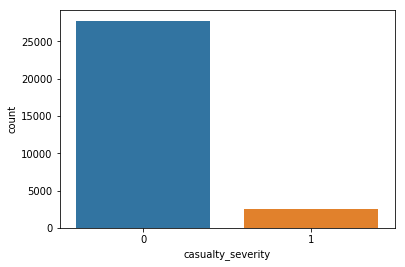

In [64]:
# --> Create x (features) and y (Target Variable) datasets 

y1 = dataset_03.casualty_severity    # target variable

drop_list = ['borough_name','casualty_severity']   # remove target vaiable and any objects form the x axis
x1 = dataset_03.drop(drop_list, axis = 1)

ax = sns.countplot(y1,label="Count")
Slight, Serious = y1.value_counts()
print('Number of Slight : ',Slight)
print('Number of Serious: ',Serious)

In [65]:
from feature_selector import FeatureSelector

# Load the data into the feature selector instance
fs = FeatureSelector(data = x1, labels = y1)

In [66]:
# Feature Selector
# --> Step A: Identify features with missing values in more than 50% of rows

fs.identify_missing(missing_threshold=0.5)
# fs.missing_stats.head(10) # --> Not required as no features identified with this method

0 features with greater than 0.50 missing values.



In [67]:
# Feature Selector
# --> Step B: Identify features with a correlation magnitude greater than 0.95

fs.identify_collinear(correlation_threshold=0.95)

# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear

7 features with a correlation magnitude greater than 0.95.



,corr_feature,corr_value,drop_feature
0,casualty_class_Pedestrian,-0.964961,ped_location_Unknown
1,casualty_class_Pedestrian,-0.998013,ped_movement_Not Applicable
2,ped_location_Unknown,0.962813,ped_movement_Not Applicable
3,casualty_class_Pedestrian,1.000000,mode_of_travel_Pedestrian
4,ped_location_Unknown,-0.964961,mode_of_travel_Pedestrian
5,ped_movement_Not Applicable,-0.998013,mode_of_travel_Pedestrian
6,highway_jurisdiction_Borough,-0.981530,highway_jurisdiction_Transport for London Road...
7,junction_detail_No Junction,1.000000,junction_control_feature_Not Applicable
8,junction_detail_No Junction,1.000000,road_2_class_Not Applicable
9,junction_control_feature_Not Applicable,1.000000,road_2_class_Not Applicable


In [68]:
# Feature Selector
# --> Step C: Zero importance features

In [69]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = True)

# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[68]	valid_0's auc: 0.720514
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[91]	valid_0's auc: 0.721545
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[76]	valid_0's auc: 0.73201
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[144]	valid_0's auc: 0.737662
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[53]	valid_0's auc: 0.710644
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[62]	valid_0's auc: 0.710819
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[205]	valid_0's auc: 0.718929
Training until validation scores don't improve for 100 rounds.
Early stoppin

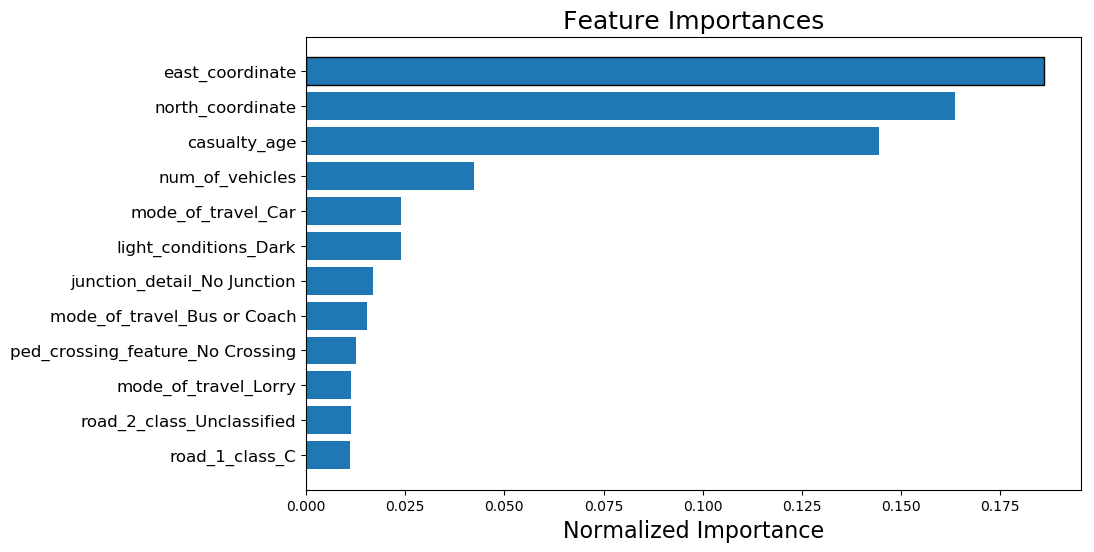

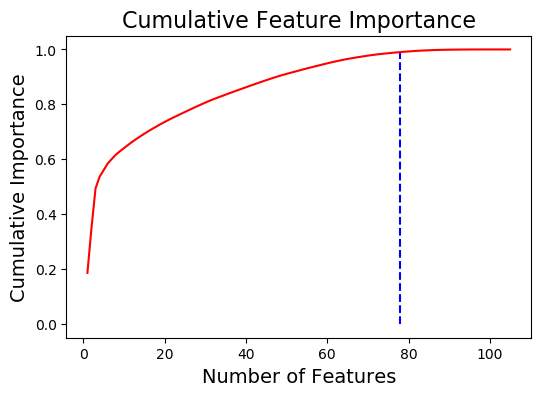

78 features required for 0.99 of cumulative importance


In [70]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [71]:
# Feature Selector
# --> Step D: Identify features with low importance

In [72]:
fs.identify_low_importance(cumulative_importance = 0.99)

77 features required for cumulative importance of 0.99 after one hot encoding.
28 features do not contribute to cumulative importance of 0.99.



In [73]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,east_coordinate,594.4,0.186041,0.186041
1,north_coordinate,522.8,0.163631,0.349671
2,casualty_age,461.2,0.144351,0.494022
3,num_of_vehicles,135.6,0.042441,0.536463
4,mode_of_travel_Car,76.9,0.024069,0.560532
5,light_conditions_Dark,76.8,0.024038,0.584570
6,junction_detail_No Junction,53.7,0.016808,0.601377
7,mode_of_travel_Bus or Coach,48.8,0.015274,0.616651
8,ped_crossing_feature_No Crossing,40.6,0.012707,0.629358
9,mode_of_travel_Lorry,36.3,0.011362,0.640720


0 features with a single unique value.



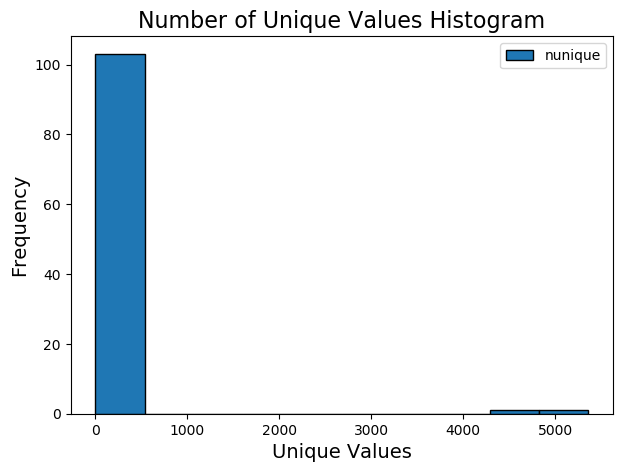

In [74]:
# Feature Selector
# --> Step E: Identify features with single unique values

fs.identify_single_unique()
fs.plot_unique()

In [75]:
# Function to remove duplications from a list (needed as we have 5 different feature removal lists)
def f2(seq):
    checked = []
    for e in seq:
        if e not in checked:
            checked.append(e)
    return checked

feature_list = fs.ops['missing'] + fs.ops['collinear'] + fs.ops['zero_importance'] + fs.ops['low_importance'] + fs.ops['single_unique']
feature_list_unique = f2(feature_list)

# --> Features to be removed
print('--> Total Features to be Removed = ' + str(len(feature_list_unique))), print('')
print('--- Feature Removal list ---'), print(feature_list_unique), print('')

# --> Step A: Features with missing values in more than 50% of rows
print('--- Step A: Missing Values ---'), print(fs.ops['missing']), print('')

# --> Step B: Identify features with a correlation magnitude greater than 0.95
print('--- Step B: Correlation > 0.95 ---'), print(fs.ops['collinear']), print('')

# --> Step C: Zero importance features
print('--- Step C: Zero Importance ---'), print(fs.ops['zero_importance']), print('')

# --> Step D: Features with low importance
print('--- Step D: Low importance ---'), print(fs.ops['low_importance']), print('')

# --> Step E: Identify features with single unique values
print('--- Step E: Single Unique Values ---'), print(fs.ops['single_unique']), print('')

--> Total Features to be Removed = 32

--- Feature Removal list ---
['ped_location_Unknown', 'ped_movement_Not Applicable', 'mode_of_travel_Pedestrian', 'highway_jurisdiction_Transport for London Road Network', 'junction_control_feature_Not Applicable', 'road_2_class_Not Applicable', 'light_conditions_Light', 'road_surface_conditions_Snow', 'ped_location_Traffic Island', 'road_surface_conditions_Flood', 'weather_conditions_Snow', 'road_type_Roundabout', 'junction_detail_Mini Roundabout', 'ped_location_Central Carriageway', 'junction_control_feature_Manual Signal', 'ped_location_In Road not Crossing', 'ped_crossing_feature_Footbridge or Subway', 'speed_limit_60 MPH', 'junction_detail_Private Drive', 'casualty_class_Pedestrian', 'weather_conditions_Other', 'other_conditions_Unknown', 'other_conditions_Yes', 'highway_jurisdiction_Highways Authority', 'road_hazard_Unknown', 'road_surface_conditions_Ice', 'road_surface_conditions_Unknown', 'road_type_Unknown', 'road_2_class_M', 'ped_movemen

(None, None, None)

In [76]:
dataset_03.shape

(30270, 107)

In [77]:
# --> Create a copy of the dataframe and remove identified features
dataset_04 = pd.DataFrame()
dataset_04 = dataset_03
dataset_04.drop(labels = feature_list_unique, axis = 1, inplace = True)
dataset_04.shape

(30270, 75)

In [78]:
# --> Use PCA to visualise the data

In [79]:
# --> Recreate the x and y following feature selection

y2 = pd.DataFrame()
y2 = dataset_04.casualty_severity

x2 = pd.DataFrame()
drop_list_2 = ['borough_name','casualty_severity']
x2 = dataset_04.drop(drop_list_2, axis = 1)

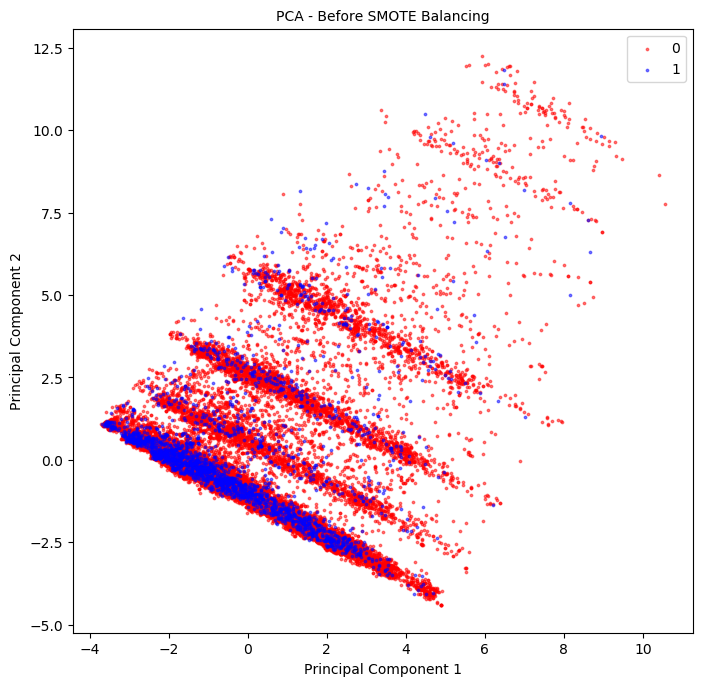

In [80]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x2_standardised = StandardScaler().fit_transform(x2)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x2_standardised)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dataset_04['casualty_severity']], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA - Before SMOTE Balancing', fontsize = 10)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['casualty_severity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 3, alpha=0.5)
ax.legend(targets)

In [81]:
# Section 4: Address Imbalance

In [82]:
# Over Sampling Algorithms based on SMOTE

from imblearn.over_sampling import SMOTE
x2_resampled, y2_resampled = SMOTE().fit_sample(x2, y2)

from collections import Counter
print('--- SMOTE Values---')
print(sorted(Counter(y2_resampled).items()))
print(x2_resampled.shape)
print(y2_resampled.shape)

y2_df = pd.DataFrame(y2_resampled)
y2_df.columns = ['casualty_severity']
y2_df.head()

--- SMOTE Values---
[(0, 27769), (1, 27769)]
(55538, 73)
(55538,)


,casualty_severity
0,0
1,1
2,0
3,0
4,0


,principal component 1,principal component 2,casualty_severity
0,-0.085598,-0.614028,0
1,2.245050,-1.699439,1
2,5.057359,-0.408204,0
3,4.913605,-0.417922,0
4,4.887254,-0.442586,0


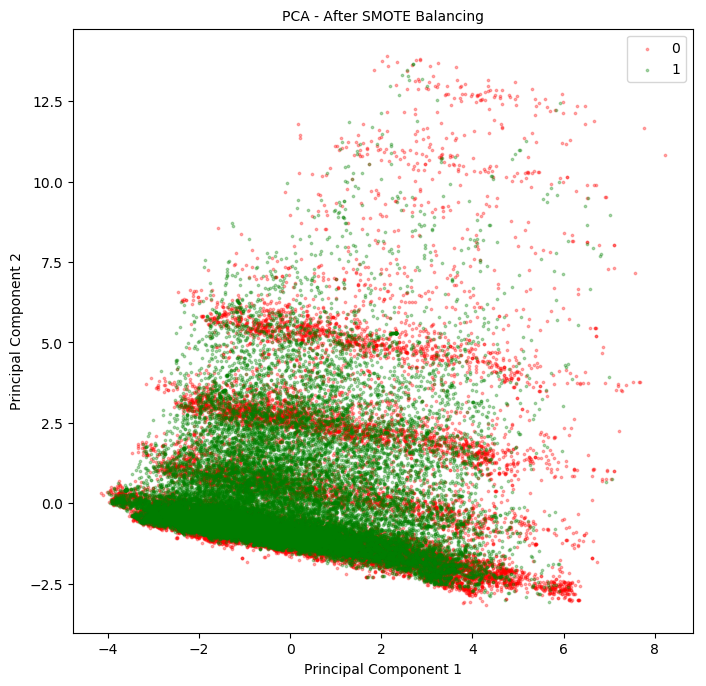

In [84]:
# --> Use PCA to visualise the data

x2_resampled_standardised = StandardScaler().fit_transform(x2_resampled)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x2_resampled_standardised)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y2_df['casualty_severity']], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA - After SMOTE Balancing', fontsize = 10)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['casualty_severity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 3, alpha=0.3)
ax.legend(targets)

finalDf.head()

In [85]:
# Section 5: Logistic regression

In [86]:
# Set dataframe with features to be used in the model

x3 = pd.DataFrame(x2_resampled)
x3.columns = x2.columns

y3 = y2_resampled

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [88]:
# no hyper parameters for first model
LogReg1 = LogisticRegression()

# using train test split to cross val
x_train1, x_test1, y_train1, y_test1 = train_test_split(x3, y3, random_state = 0)

# fit model
LogReg1.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
name = x3.columns
coef = LogReg1.coef_[0]
pd.DataFrame([name,coef],index = ['Feature','Coeficient']).transpose()

,Feature,Coeficient
0,east_coordinate,2.30776e-06
1,north_coordinate,-6.51468e-06
2,casualty_age,0.0119395
3,num_of_vehicles,-0.264742
4,casualty_class_Driver or Rider,-0.527219
5,casualty_class_Passenger,-0.271285
6,ped_location_Crossing Road off Pedestrian Cros...,0.137951
7,ped_location_Crossing Road on Pedestrian Crossing,0.294999
8,ped_location_Footpath,0.0684595
9,ped_movement_Drivers Near Side,0.157114


In [90]:
y_pred1 = LogReg1.predict(x_test1)

In [91]:
metrics.accuracy_score(y_test1,y_pred1)

0.6746849117752971

In [93]:
LogReg1.score(x_train1, y_train1)

0.67683000024007878

In [94]:
metrics.confusion_matrix(y_test1,y_pred1)

array([[4222, 2748],
       [1769, 5146]])

In [95]:
metrics.roc_auc_score(y_test1,y_pred1)

0.67495910061818487

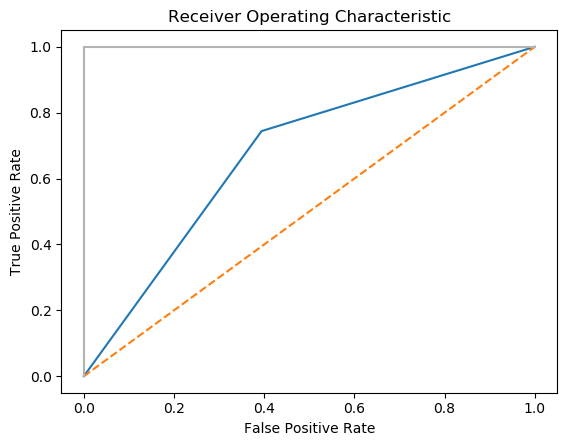

In [96]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test1,y_pred1)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
metrics.log_loss(y_test1,y_pred1)

11.236143339542652

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

cross_val_score(LogReg1, x3, y3, scoring="recall")

array([ 0.76536675,  0.73671132,  0.7031115 ])

In [99]:
# check overfitting with cross-validation

In [100]:
# Load libraries
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# create pipelien

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression
# logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, LogReg1)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             x3, # Feature matrix
                             y3, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

# Calculate mean
cv_results.mean()

0.67746431561615206

In [ ]:
# Use Regularization to optimize your model

In [102]:
# X and y features

# using train test split to cross val
x_train2, x_test2, y_train2, y_test2 = train_test_split(x3,y3, random_state =0)

cees = [0.01, 0.1, 1.0, 10, 100]

for c in cees:
    logreg = LogisticRegression(penalty='l1', C=c)
    logreg.fit(x_train2,y_train2)
    y_pred2 = logreg.predict(x_test2)
    roc = metrics.roc_auc_score(y_test2, y_pred2)
    print(roc," : ", c)

0.670343617051  :  0.01
0.674996187566  :  0.1
0.67620885294  :  1.0
0.676137116928  :  10
0.675776725165  :  100


In [103]:
cees = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7 ,1.8, 1.9]

for c in cees:
    logreg = LogisticRegression(penalty='l1', C=c)
    logreg.fit(x_train2,y_train2)
    y_pred2 = logreg.predict(x_test2)
    roc = metrics.roc_auc_score(y_test2, y_pred2)
    print(roc," : ", c)

0.676496938122  :  1.1
0.676569244702  :  1.2
0.676568103565  :  1.3
0.67620885294  :  1.4
0.676281730088  :  1.5
0.676353466099  :  1.6
0.676497508691  :  1.7
0.676209423508  :  1.8
0.676353466099  :  1.9


In [ ]:
# maybe change this to focus on sending ambulances in case of serious injuries based on inital report